#NAIRA CURRENCY CLASSIFIER FOR THE CURRENCY COUNTER MOBILE APPLICATION PROJECT

**Author** 
: Ateniola Oluwatobi Victor

**Objective** : An implementation of a classifier to recognize images of the various denominations of the Nigerian Naira currency and also correctly classify the denominations. I built the classifier by using a modified Residual Neural Network(ResNet), I used the ResNet architecture because of its relatively small size and accuracy. I modified the ResNet architecure by changing the final sequential layer to classify the banknotes correctly. I made use of pytorch to create and train the model and then I converted the gradients of the trained model to the ONNX and PB format in order to easily integrate in a mobile application.


**Google Drive Import on Google Colab**

In [0]:
#Google Drive Import on Google Colab
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/NAIRA'

In [3]:
#Library import to perform os operations
import os
import subprocess
from PIL import Image

#Library import to to perform maths operations and to plot graphs
import numpy as np
import matplotlib.pyplot as plt

#Library import to use pytorch
import torch
from torch import nn
from torch import optim
import torch.onnx
import torch.nn.functional as F
import torchvision
from torchvision import transforms, models, datasets
from torch.autograd import Variable

#Library import to convert pytorch model to onnx format
import onnx
from onnx_tf.backend import prepare
from onnx import helper

#Library import to convert onnx format to mobile friendly caffe2 format
import caffe2.python.onnx.backend as onnx_caffe2_backend
from caffe2.python.predictor import mobile_exporter
from caffe2.proto import caffe2_pb2
from caffe2.python import core, net_drawer, net_printer, visualize, workspace, utils
import caffe2.python.onnx.backend


/usr/local/lib/python3.6/dist-packages/onnx_tf/common/__init__.py:87: UserWarning: onnx_tf.common.get_outputs_names is deprecated. It will be removed in future release. Use TensorflowGraph.get_outputs_names instead.
  warnings.warn(message)
W0820 09:52:17.350237 140300736243584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/onnx_tf/handlers/backend/ceil.py:10: The name tf.ceil is deprecated. Please use tf.math.ceil instead.

W0820 09:52:17.357268 140300736243584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/onnx_tf/handlers/backend/depth_to_space.py:12: The name tf.depth_to_space is deprecated. Please use tf.compat.v1.depth_to_space instead.

W0820 09:52:17.361622 140300736243584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/onnx_tf/handlers/backend/erf.py:9: The name tf.erf is deprecated. Please use tf.math.erf instead.

W0820 09:52:18.452103 140300736243584 lazy_loader.py:50] 
The TensorFlow contrib module w

In [0]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ])


test_transforms = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [0]:
train_data = datasets.ImageFolder(data_dir + "/Data/Train" , transform=train_transforms)
test_data = datasets.ImageFolder(data_dir  + "/Data/Test" , transform=test_transforms)
class_names = train_data.classes


In [0]:
trainloader = torch.utils.data.DataLoader(train_data , batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data , batch_size=64, shuffle=True)

In [16]:

model = load_model(data_dir) if os.path.exists(data_dir + '/model_weights/checkpoint.pth') else create_model()
model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [17]:
model = train_model(model, device, 6, trainloader, testloader)

Currently using  cuda
EPOCH 1
  THE RUNNING LOSS IS 2.236693286895752
  THE TEST PERCENTAGE IS 0.3402777910232544
EPOCH 1
  THE RUNNING LOSS IS 1.5716129064559936
  THE TEST PERCENTAGE IS 0.2586805820465088
EPOCH 1
  THE RUNNING LOSS IS 1.2505617618560791
  THE TEST PERCENTAGE IS 0.3732639253139496
EPOCH 1
  THE RUNNING LOSS IS 0.9275718927383423
  THE TEST PERCENTAGE IS 0.3697916865348816
EPOCH 1
  THE RUNNING LOSS IS 0.7617600202560425
  THE TEST PERCENTAGE IS 0.538194477558136
EPOCH 1
  THE RUNNING LOSS IS 0.6398110270500184
  THE TEST PERCENTAGE IS 0.4479166865348816
EPOCH 1
  THE RUNNING LOSS IS 0.5886604487895966
  THE TEST PERCENTAGE IS 0.5121527910232544
EPOCH 2
  THE RUNNING LOSS IS 0.5161669373512268
  THE TEST PERCENTAGE IS 0.5677083730697632
EPOCH 2
  THE RUNNING LOSS IS 0.5128214716911316
  THE TEST PERCENTAGE IS 0.5729166865348816
EPOCH 2
  THE RUNNING LOSS IS 0.3596955299377441
  THE TEST PERCENTAGE IS 0.4704861342906952
EPOCH 2
  THE RUNNING LOSS IS 0.36645066142082217


In [0]:
save_model(model ,data_dir)

The predictions are  ['500', '20', '05', '100']


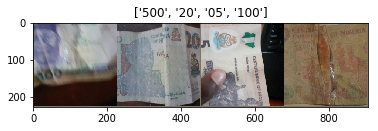

In [23]:
test_predict(testloader, model)

In [0]:
batch_size = 1
# Input to the model
x = Variable(torch.randn(batch_size, 3, 224, 224), requires_grad=True)

#Generates onnx format from pytorch pth file
torch_out = generate_onnx(model, x)

#Converts onnx format to more mobile friendly pb format
# where naira_init_net.pb - stores the structure of the model
# naira_predict_net - stores the weights and other parameters of the model
convert_to_mobile_friendly_format(model, torch_out, x)

In [32]:
#Verifies that the 2 ".pb" files works by testing on a dummy dataset
verify_coffe2_working()

[[0.00263736 0.00436988 0.34423348 0.00252272 0.02454991 0.02725486
  0.53154737 0.06288442]]


In [0]:
def create_model():
# Loading in the resnet pre-trained model.
  model = models.resnet18(pretrained=True)
  # Freeze parameters so we don't backprop through them
  for param in model.parameters():
      param.requires_grad = False
  #code to modify the last layer of the pre-trained network to suite my classification
  model.fc = nn.Sequential(
                      nn.Linear(512, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, 8),                   
                      nn.LogSoftmax(dim=1))
  return model

In [0]:
#Method to load the current state of the model if it exists
def load_model(data_dir, name = "checkpoint.pth"):
  print("Model checkpoint found and loaded")
  model = create_model()
  state_dict = torch.load(data_dir + '/model_weights/checkpoint.pth')
  model.load_state_dict(state_dict)
  return model
  
  

In [0]:
def save_model(model, data_dir, name = "checkpoint.pth"):
  torch.save(model.state_dict(), data_dir+"/model_weights/checkpoint.pth")

In [0]:


def train_model(model, device, epochs, trainloader, testloader):
  #Try and catch block to return the current model state when the cancel button is clicked in order to allow for early stopping.
  try:
    print("Currently using ", device)
    #loss function to be used
    criterion = nn.NLLLoss()
    
    #Adam optimizer
    optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
    
    #Moving the model to either cpu or gpu if available
    model.to(device);
    
    
    steps = 0
    running_loss = 0
    print_every = 5
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            steps += 1
            # Move input and label tensors to the default device
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            logps = model.forward(inputs)
#             print("Aqui")
            loss = criterion(logps, labels)
  #           loss.requires_grad_()
            loss.backward()
  #           print("Here")
            optimizer.step()

            running_loss += loss.item()

            if ((steps % print_every) == 0):
              cum_perc = 0
              for imgs, labels in testloader:
                  model.eval()
                  imgs, labels = imgs.to(device), labels.to(device)
                  with torch.no_grad():
                    ps =  torch.exp(model.forward(imgs))
                    top_p, top_class = ps.topk(1, dim = 1)
                    prob = top_class == labels.view(*top_class.shape)
                    prob = prob.float()
                    cum_perc += prob.mean().float()
              model.train()
              print("""EPOCH {0}
  THE RUNNING LOSS IS {1}
  THE TEST PERCENTAGE IS {2}""".format(epoch+1, running_loss /  print_every, cum_perc / len(testloader)))
              running_loss = 0
  except KeyboardInterrupt:
    pass
  return model

In [0]:
#The method is for displaying an image from its tensors.
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [0]:
#The method is for running inference of the model on images to display the images and predictions
def test_predict(testloader, model):
  inputs, classes = next(iter(testloader))
  inputs = inputs[15:19]
  classes = classes[15:19]
  model.to("cpu")
  # # Make a grid from batch
  out = torchvision.utils.make_grid(inputs)
  model.eval()
  with torch.no_grad():
       ps =  torch.exp(model.forward(inputs))
       top_p, top_class = ps.topk(1, dim = 1)

  top_class =[class_names[x] for x in top_class]
  print('The predictions are ', top_class)
  imshow(out, title=[class_names[x] for x in classes])
  

In [0]:
#The method is for converting the model from pytorch to a more global onnx format
def generate_onnx(model, x): 
  batch_size = 1    # just a random number

  # Export the model
  model.eval()
  torch_out = torch.onnx._export(model,             # model being run
                                 x,                       # model input (or a tuple for multiple inputs)
                                 data_dir +"/model_weights/nairanet.onnx",       # where to save the model (can be a file or file-like object)
                                 export_params=True)      # store the trained parameter weights inside the model file
  return torch_out

In [0]:
#The method is for converting the model to a caffe2 format which is more suitable for mobile devices
def convert_to_mobile_friendly_format(model, torch_out, x):
  # Load the ONNX GraphProto object. Graph is a standard Python protobuf object
  model = onnx.load(data_dir +"/model_weights/nairanet.onnx")
  
  # prepare the caffe2 backend for executing the model this converts the ONNX graph into a
  # Caffe2 NetDef that can execute it. Other ONNX backends, like one for CNTK will be
  # availiable soon.
  prepared_backend = caffe2.python.onnx.backend.prepare(model)

  # run the model in Caffe2

  # Construct a map from input names to Tensor data.
  # The graph itself contains inputs for all weight parameters, followed by the input image.
  # Since the weights are already embedded, we just need to pass the input image.
  # last input the grap
  W = {model.graph.input[0].name: x.data.numpy()}

  # Run the Caffe2 net:
  c2_out = prepared_backend.run(W)[0]

  # Verify the numerical correctness upto 3 decimal places
  np.testing.assert_almost_equal(torch_out.data.cpu().numpy(), c2_out, decimal=3)
  # Export to mobile
  from caffe2.python.onnx.backend import Caffe2Backend as c2

  init_net, predict_net = c2.onnx_graph_to_caffe2_net(model)
  with open(data_dir + "/model_weights/naira_init_net.pb", "wb") as f:
      f.write(init_net.SerializeToString())
  with open(data_dir + "/model_weights/naira_predict_net.pb", "wb") as f:
      f.write(predict_net.SerializeToString())

In [0]:
#Method is to verify if the coffe2 format is operational
def verify_coffe2_working():
  # Verify it runs with predictor
  with open(data_dir + "/model_weights/naira_init_net.pb", "rb") as f:
      init_net = f.read()
  with open(data_dir + "/model_weights/naira_predict_net.pb", "rb") as f:
      predict_net = f.read()
  from caffe2.python import workspace
  p = workspace.Predictor(init_net, predict_net)
  # The following code should run:
  img = np.random.rand(1, 3, 224, 224).astype(np.float32)
  result, = p.run([img])
  print(np.exp(result)) # our model produces prediction for each of ImageNet 1000 classes